<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Jeremy_Meek_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import matplotlib.pyplot as plt

In [0]:
def bayes_pos_n(prior_positive, true_positive, true_negative, runs=1):
  '''
  Runs bayes theroem recursively on positive results
  
  Returns the probability that successive positive results is a true positive
  '''
  if runs == 1:
    return true_positive*prior_positive/(true_positive*prior_positive+(1-true_negative)*(1-prior_positive))
  else:
    prior_positive = bayes_pos_n(prior_positive, true_positive, true_negative, runs-1)
    return true_positive*prior_positive/(true_positive*prior_positive+(1-true_negative)*(1-prior_positive))

In [24]:
#testing function with drug user example
print(bayes_pos_n(.005, .99, .99))
print(bayes_pos_n(.005, .99, .99, 2))
print(bayes_pos_n(.005, .99, .99, 3))

0.33221476510067094
0.9800999999999999
0.9997949506335922


In [17]:
0.001/0.08

0.0125

In [30]:
#test function on drunk driver example
#rounding error exists
bayes_pos_n(.001, 1, .92)
print(bayes_pos_n(.001, 1, .92))
print(bayes_pos_n(.001, 1, .92, 2))
print(bayes_pos_n(.001, 1, .92, 3))
print(bayes_pos_n(.001, 1, .92, 4))

0.012357884330202676
0.1352521099329151
0.6615996951348608
0.9606895076105055


In [0]:
def plot_bayes_pos_n(prior_positive, true_positive, true_negative, num_runs=10):
  fig, ax = plt.subplots()
  fig.patch.set_facecolor('white')

  runs=range(1, num_runs)
  frequentists_results = [1-(1-true_negative)**(run) for run in runs]
  bayes_results = [bayes_pos_n(prior_positive, true_positive, true_negative, run) for run in runs]

  plt.plot(runs, frequentists_results, label='Frequentists', marker='o')
  plt.plot(runs, bayes_results, label='Bayes', marker='o')

  plt.legend()
  plt.grid()
  plt.show()

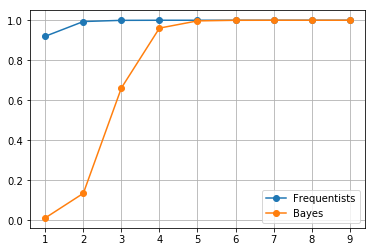

In [49]:
plot_bayes_pos_n(.001, 1, .92)

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)